# Convolutional Neural Networks Project

## Munsif Raza

# Dataset
We shall use built-in dataset of Tensorflow named CIFAR Image dataset. It has 60,000 images of 32*32 pixels divided into ten different classes of real-world objects.

In [17]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading and splitting the dataset.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 110s 1us/step


In [3]:
# Normalizing the data between 0 and 1
train_images, test_images = train_images / 255.0 , test_images / 255.0

In [4]:
# Classes names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

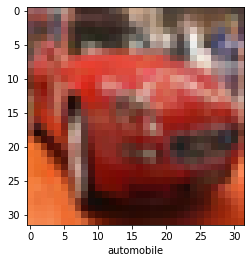

In [7]:
# Let's look our data
plt.imshow(train_images[5], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[5][0]])
plt.show()

# CNN Architecture
CNN consists of stack of Conv2D and MaxPooling2D layers which will extract the features from an image then it will have few Densely connected layers to predict the class of the object.

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

## Layer 1:
It is input layer which will have 32 filters of size 3*3 and relu function will be applied as activation function.
## Layer 2:
It is a MaxPooling layer which will simplify the output of input layer.
## Other layers:
After these two layers we have some Conv2D and MaxPooling layers

In [9]:
# Summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

# Adding Dense Layers
Now we are done with Convolutional Layers that has given us the features in an image. we shall add dense layers to classify it.

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
# Model Summary now
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

# Training the Model
We are done with building the model. Now We shall compile and train it with our data.

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 29s 17ms/step - loss: 1.5551 - accuracy: 0.4315 - val_loss: 1.3143 - val_accuracy: 0.5268
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2064 - accuracy: 0.5689 - val_loss: 1.2026 - val_accuracy: 0.5763
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0656 - accuracy: 0.6214 - val_loss: 1.0634 - val_accuracy: 0.6198
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9727 - accuracy: 0.6571 - val_loss: 1.0073 - val_accuracy: 0.6440
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9073 - accuracy: 0.6785 - val_loss: 0.9752 - val_accuracy: 0.6539
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8534 - accuracy: 0.6992 - val_loss: 0.9460 - val_accuracy: 0.6675
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8034 - accuracy: 0.7171 - val_loss: 0.9422 -

# Evaluating the Model
Now we are done with training let's evaluate our model that how we it is doing.

313/313 - 2s - loss: 0.9217 - accuracy: 0.6947 - 2s/epoch - 6ms/step


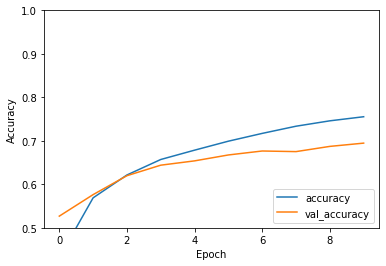

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [23]:
print('Accuracy:', test_acc)

Accuracy: 0.6947000026702881


# Making Predictions
We shall make predictions using new data to the model.

In [15]:
predictions = model.predict(test_images)

In [18]:
# We are getting here array of Probability distribution let's see which class is this.
print(np.argmax(predictions[0]))

3


In [19]:
# Let's see what's that in classes
print(class_names[np.argmax(predictions[0])])

cat


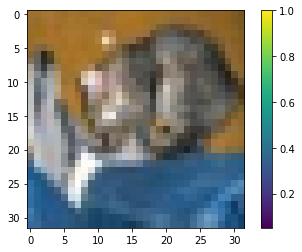

In [20]:
# Let's see is it really an ankle boot in testing data.
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Conclusion:
We made a Convolutional Neural Network model. In which we used Conv2D, MaxPooling and Dense layers. We trained this model with TensorFlow's built-in dataset named CIFAR10 dataset. And at the end we made prediction.